In [6]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

In [7]:
import numpy as np 
import pandas as pd 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import os

In [8]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
data = pd.read_csv('TamilFakeAndReal.csv')
data.shape

(14564, 4)

In [10]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))
data['removed_punc'] = data['English'].apply(lambda x: remove_punct(x))
data.head()

# Converting to lower case

def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

# Remove tokens of length less than 3

def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,Unnamed: 0,English,Tamil,Is Fake,removed_punc,tokens,filtered_tokens
0,0,"""There is no precaution"".. Scolded Chief Minis...",சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,There is no precaution Scolded Chief Minister ...,"[there, is, no, precaution, scolded, chief, mi...","[there, precaution, scolded, chief, minister, ..."
1,1,34 people have corona in Saidapet Govt Trainin...,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,34 people have corona in Saidapet Govt Trainin...,"[34, people, have, corona, in, saidapet, govt,...","[people, have, corona, saidapet, govt, trainin..."
2,2,Hanuman Jayanti at Dhanwandri Peedam: 100008 V...,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,Hanuman Jayanti at Dhanwandri Peedam 100008 Va...,"[hanuman, jayanti, at, dhanwandri, peedam, 100...","[hanuman, jayanti, dhanwandri, peedam, 100008,..."
3,3,Happy New Year 2022: Do you know which country...,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,Happy New Year 2022 Do you know which country ...,"[happy, new, year, 2022, do, you, know, which,...","[happy, year, 2022, know, which, country, welc..."
4,4,Devotees thronging Sabarimala: Allowed to visi...,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,Devotees thronging Sabarimala Allowed to visit...,"[devotees, thronging, sabarimala, allowed, to,...","[devotees, thronging, sabarimala, allowed, vis..."


In [11]:
# Remove stopwords

nltk.download('stopwords')
nltk.download('wordnet')
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]
data['clean_tokens'] = data['filtered_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

# Apply lemmatization on tokens

def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,Unnamed: 0,English,Tamil,Is Fake,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,0,"""There is no precaution"".. Scolded Chief Minis...",சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,There is no precaution Scolded Chief Minister ...,"[there, is, no, precaution, scolded, chief, mi...","[there, precaution, scolded, chief, minister, ...","[precaution, scolded, chief, minister, stalin,...","[precaution, scolded, chief, minister, stalin,...",precaution scolded chief minister stalin diffi...
1,1,34 people have corona in Saidapet Govt Trainin...,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,34 people have corona in Saidapet Govt Trainin...,"[34, people, have, corona, in, saidapet, govt,...","[people, have, corona, saidapet, govt, trainin...","[people, corona, saidapet, govt, training, cen...","[people, corona, saidapet, govt, training, cen...",people corona saidapet govt training center he...
2,2,Hanuman Jayanti at Dhanwandri Peedam: 100008 V...,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,Hanuman Jayanti at Dhanwandri Peedam 100008 Va...,"[hanuman, jayanti, at, dhanwandri, peedam, 100...","[hanuman, jayanti, dhanwandri, peedam, 100008,...","[hanuman, jayanti, dhanwandri, peedam, 100008,...","[hanuman, jayanti, dhanwandri, peedam, 100008,...",hanuman jayanti dhanwandri peedam 100008 vada ...
3,3,Happy New Year 2022: Do you know which country...,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,Happy New Year 2022 Do you know which country ...,"[happy, new, year, 2022, do, you, know, which,...","[happy, year, 2022, know, which, country, welc...","[happy, year, 2022, know, country, welcomes, y...","[happy, year, 2022, know, country, welcome, ye...",happy year 2022 know country welcome year firs...
4,4,Devotees thronging Sabarimala: Allowed to visi...,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,Devotees thronging Sabarimala Allowed to visit...,"[devotees, thronging, sabarimala, allowed, to,...","[devotees, thronging, sabarimala, allowed, vis...","[devotees, thronging, sabarimala, allowed, vis...","[devotee, thronging, sabarimala, allowed, visi...",devotee thronging sabarimala allowed visit ayy...


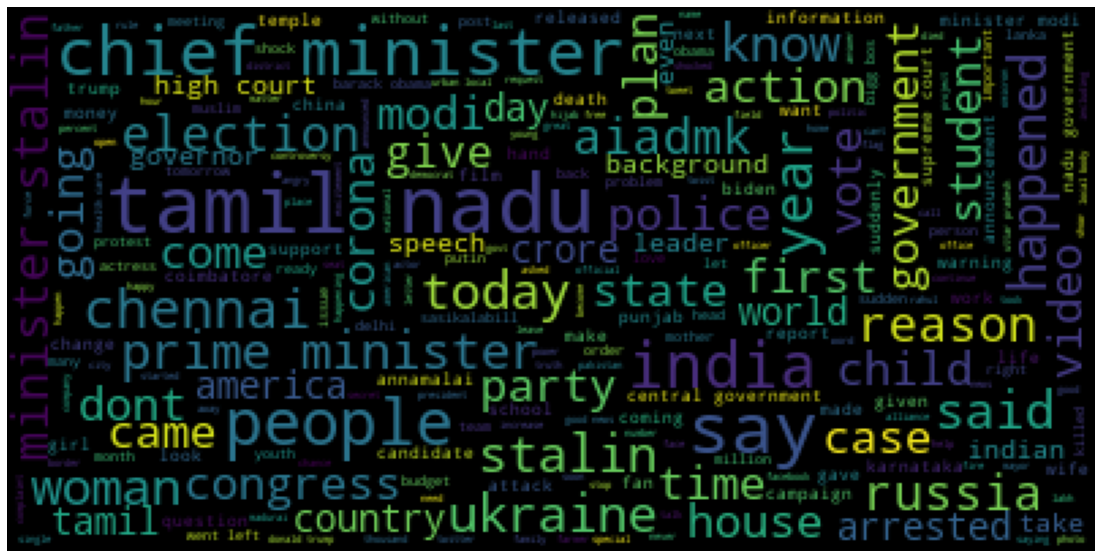

In [12]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(data['clean_text'], data['English'], test_size=0.5, random_state = 5)

print(X_train.shape)
print(X_test.shape)

(7282,)
(7282,)


In [8]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = 10000, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = 500 # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 500, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the LSTM on the training data
history = model.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=3, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
) 

Epoch 1/3


UnimplementedError:  Cast string to float is not supported
	 [[node sequential/Cast
 (defined at C:\Users\HP\anaconda3\lib\site-packages\keras\engine\functional.py:671)
]] [Op:__inference_train_function_3218]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/Cast:
In[0] IteratorGetNext (defined at C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py:866)

Operation defined at: (most recent call last)
>>>   File "C:\Users\HP\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-9-4e256ce4beac>", line 2, in <module>
>>>     history = model.fit(
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\functional.py", line 571, in _run_internal_graph
>>>     y = self._conform_to_reference_input(y, ref_input=x)
>>> 
>>>   File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\functional.py", line 671, in _conform_to_reference_input
>>>     tensor = tf.cast(tensor, dtype=ref_input.dtype)
>>> 

In [11]:
data.head()

,Unnamed: 0,English,Tamil,Is Fake,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,0,"""There is no precaution"".. Scolded Chief Minis...",சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,There is no precaution Scolded Chief Minister ...,"[there, is, no, precaution, scolded, chief, mi...","[there, precaution, scolded, chief, minister, ...","[precaution, scolded, chief, minister, stalin,...","[precaution, scolded, chief, minister, stalin,...",precaution scolded chief minister stalin diffi...
1,1,34 people have corona in Saidapet Govt Trainin...,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,34 people have corona in Saidapet Govt Trainin...,"[34, people, have, corona, in, saidapet, govt,...","[people, have, corona, saidapet, govt, trainin...","[people, corona, saidapet, govt, training, cen...","[people, corona, saidapet, govt, training, cen...",people corona saidapet govt training center he...
2,2,Hanuman Jayanti at Dhanwandri Peedam: 100008 V...,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,Hanuman Jayanti at Dhanwandri Peedam 100008 Va...,"[hanuman, jayanti, at, dhanwandri, peedam, 100...","[hanuman, jayanti, dhanwandri, peedam, 100008,...","[hanuman, jayanti, dhanwandri, peedam, 100008,...","[hanuman, jayanti, dhanwandri, peedam, 100008,...",hanuman jayanti dhanwandri peedam 100008 vada ...
3,3,Happy New Year 2022: Do you know which country...,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,Happy New Year 2022 Do you know which country ...,"[happy, new, year, 2022, do, you, know, which,...","[happy, year, 2022, know, which, country, welc...","[happy, year, 2022, know, country, welcomes, y...","[happy, year, 2022, know, country, welcome, ye...",happy year 2022 know country welcome year firs...
4,4,Devotees thronging Sabarimala: Allowed to visi...,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,Devotees thronging Sabarimala Allowed to visit...,"[devotees, thronging, sabarimala, allowed, to,...","[devotees, thronging, sabarimala, allowed, vis...","[devotees, thronging, sabarimala, allowed, vis...","[devotee, thronging, sabarimala, allowed, visi...",devotee thronging sabarimala allowed visit ayy...


In [17]:
corpus = data['clean_text']
df = data['Is Fake']

In [18]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
y = df.values

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

classifier = {'Logistic Regression':LogisticRegression(),'SVM':svm.SVC(kernel='linear'),'Naive Bayes':GaussianNB(),
              'KNN':KNeighborsClassifier(),'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier()}

for i in classifier:
    classifier[i].fit(X_train, y_train)
    ypred = classifier[i].predict(X_test)
    print('Accuracy Score w.r.t ' + i + ' :' + str(accuracy_score(y_test,ypred)))
    
model = GaussianNB()
model.fit(X_train,y_train)
ypred = model.predict(X_test)
confusion_matrix(y_test,ypred)

Accuracy Score w.r.t Logistic Regression :0.9234466186062479
Accuracy Score w.r.t SVM :0.9227600411946447
Accuracy Score w.r.t Naive Bayes :0.6333676622039135
Accuracy Score w.r.t KNN :0.8551321661517336
Accuracy Score w.r.t Decision Tree :0.8698935805012015
Accuracy Score w.r.t Random Forest :0.9031925849639547


array([[1287, 1035],
       [  33,  558]], dtype=int64)

In [31]:
ypred = classifier['Logistic Regression'].predict(X_test)

In [32]:
accuracy_score(y_test, ypred)

0.9234466186062479

In [47]:
msg = "Congress chief dials Kejriwal".lower()
input1 = [msg]

input_data = cv.transform(input1).toarray()

input_pred = classifier['SVM'].predict(input_data)

if input_pred[0]==1:
    print("Msg is Real")
else:
    print("Msg is Fake")

Msg is Fake


In [51]:
for i in list(classifier.keys()):
    print(i, classifier[i].predict(cv.transform(["Delhi Covid Case: Over 1,300 New Infections Recorded In A Day; Positivity Rate At Over 30%".lower()]).toarray()))

Logistic Regression [0]
SVM [0]
Naive Bayes [1]
KNN [0]
Decision Tree [1]
Random Forest [1]


In [15]:
from tensorflow.keras.layers import Embedding, LSTM, Dense ## Neural networks layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot # to encode the depending variable 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
voc_size=5000

In [19]:
X = data['clean_text']
y = data['Is Fake']

In [20]:
X=[i.lower() for i in X]

In [21]:
onehot=[one_hot(words,voc_size) for words in X] 

In [22]:
sen_len=100
embedded_doc=pad_sequences(onehot, padding='pre', maxlen=sen_len) # pad sequence your texts
print(embedded_doc)

[[   0    0    0 ...   67 2044 1475]
 [   0    0    0 ...  632 4535 2961]
 [   0    0    0 ... 3856 2363 2603]
 ...
 [   0    0    0 ... 3258   67  384]
 [   0    0    0 ... 3902 4773 4475]
 [   0    0    0 ... 1371 3457 1271]]


In [23]:
embedding_vector_feature=40 
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_feature, input_length=sen_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
# sigmoid : to handle the output ( binary case )
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# binary_crossentropy : because we have a binaray classification task 
# Adam : Stochastic gradient decenet optimizatiion 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 40)           200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
X_final=np.array(embedded_doc)
y_final=np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_final, y_final, test_size=0.20, random_state=0)

In [26]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
183/183 [==============================] - 42s 205ms/step - loss: 0.3534 - accuracy: 0.8603 - val_loss: 0.2278 - val_accuracy: 0.9183
Epoch 2/10
183/183 [==============================] - 36s 198ms/step - loss: 0.1469 - accuracy: 0.9453 - val_loss: 0.2318 - val_accuracy: 0.9142
Epoch 3/10
183/183 [==============================] - 37s 202ms/step - loss: 0.0975 - accuracy: 0.9663 - val_loss: 0.2682 - val_accuracy: 0.9066
Epoch 4/10
183/183 [==============================] - 36s 199ms/step - loss: 0.0683 - accuracy: 0.9783 - val_loss: 0.3235 - val_accuracy: 0.9039
Epoch 5/10
183/183 [==============================] - 37s 200ms/step - loss: 0.0495 - accuracy: 0.9843 - val_loss: 0.3291 - val_accuracy: 0.8977
Epoch 6/10
183/183 [==============================] - 36s 198ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.4575 - val_accuracy: 0.8946
Epoch 7/10
183/183 [==============================] - 37s 200ms/step - loss: 0.0902 - accuracy: 0.9680 - val_loss: 0.3446 - val_ac

In [27]:
model.save('FakeNews.h5')

In [45]:
ypred = model.predict(X_test)

In [46]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

92/92 - 2s - loss: 0.5953 - accuracy: 0.8871 - 2s/epoch - 19ms/step


In [63]:
testNews = str(input()).lower()

Covid increased all over india by 1%


In [64]:
testNews = [testNews]

In [65]:
newOneHot = [one_hot(words,voc_size) for words in testNews] 

In [66]:
newEmbedded_doc=pad_sequences(newOneHot, padding='pre', maxlen=sen_len)

In [67]:
testFinal=np.array(embedded_doc)

In [80]:
a = model.predict(testFinal)

In [75]:
score = tf.nn.softmax(a)

In [76]:
 100 * np.max(score)

100.0

In [77]:
np.argmax(score)

0

In [82]:
for i in range(len(testFinal)):
 print("Predicted=%s" % (a[i]))

Predicted=[0.00017318]
Predicted=[0.00271067]
Predicted=[2.3595721e-06]
Predicted=[3.8994367e-06]
Predicted=[0.00020346]
Predicted=[0.00018406]
Predicted=[0.00016001]
Predicted=[1.2445455e-05]
Predicted=[1.597666e-06]
Predicted=[7.262755e-08]
Predicted=[0.00310904]
Predicted=[0.00057429]
Predicted=[4.2652237e-06]
Predicted=[0.01301193]
Predicted=[0.1811781]
Predicted=[2.2044986e-05]
Predicted=[2.9111884e-06]
Predicted=[4.043836e-08]
Predicted=[2.3570935e-06]
Predicted=[3.490191e-07]
Predicted=[7.783055e-05]
Predicted=[9.633014e-07]
Predicted=[0.00348192]
Predicted=[1.5595157e-07]
Predicted=[1.563682e-06]
Predicted=[3.590098e-07]
Predicted=[0.00019479]
Predicted=[4.7903796e-07]
Predicted=[0.00369242]
Predicted=[6.7432597e-06]
Predicted=[2.7964577e-06]
Predicted=[2.502039e-07]
Predicted=[2.5937256e-06]
Predicted=[3.160528e-05]
Predicted=[6.773885e-05]
Predicted=[1.2993053e-05]
Predicted=[0.00192848]
Predicted=[1.2608975e-06]
Predicted=[1.4945623e-06]
Predicted=[0.97133553]
Predicted=[1.0

Predicted=[9.424464e-06]
Predicted=[3.2023563e-06]
Predicted=[7.942498e-05]
Predicted=[3.3042968e-06]
Predicted=[0.00078815]
Predicted=[2.8584989e-06]
Predicted=[1.2100952e-05]
Predicted=[9.996213e-05]
Predicted=[7.7753875e-06]
Predicted=[0.00525162]
Predicted=[0.20289302]
Predicted=[1.5876272e-05]
Predicted=[0.00018978]
Predicted=[3.1238212e-06]
Predicted=[0.00432351]
Predicted=[7.1015606e-06]
Predicted=[2.2788083e-05]
Predicted=[0.00663558]
Predicted=[2.1552452e-07]
Predicted=[5.6823455e-07]
Predicted=[0.00084081]
Predicted=[0.00101238]
Predicted=[2.7877427e-06]
Predicted=[0.01422152]
Predicted=[3.0462954e-07]
Predicted=[5.6887497e-05]
Predicted=[0.00078008]
Predicted=[1.5721287e-06]
Predicted=[0.00061083]
Predicted=[2.7024998e-05]
Predicted=[2.977007e-06]
Predicted=[1.584664e-05]
Predicted=[0.00075325]
Predicted=[2.2146636e-05]
Predicted=[1.2185263e-06]
Predicted=[0.00030902]
Predicted=[0.03374711]
Predicted=[1.1181548e-06]
Predicted=[1.8402619e-06]
Predicted=[1.7629092e-05]
Predict

Predicted=[5.0348507e-07]
Predicted=[3.127744e-06]
Predicted=[0.00011156]
Predicted=[0.03936189]
Predicted=[2.749386e-07]
Predicted=[5.6411534e-07]
Predicted=[1.275136e-05]
Predicted=[5.321921e-05]
Predicted=[5.9107874e-06]
Predicted=[0.00025517]
Predicted=[2.9965697e-06]
Predicted=[2.3655596e-07]
Predicted=[1.3017698e-05]
Predicted=[0.01059186]
Predicted=[2.777637e-06]
Predicted=[0.00041988]
Predicted=[1.8638535e-06]
Predicted=[3.463955e-07]
Predicted=[4.2872676e-07]
Predicted=[0.00062588]
Predicted=[6.1066626e-06]
Predicted=[2.3914831e-06]
Predicted=[4.9596038e-06]
Predicted=[1.6799017e-05]
Predicted=[1.9558882e-05]
Predicted=[6.808655e-06]
Predicted=[3.55398e-06]
Predicted=[1.2880118e-05]
Predicted=[2.83706e-06]
Predicted=[1.4225516e-06]
Predicted=[1.9922079e-07]
Predicted=[0.00042608]
Predicted=[4.1936443e-07]
Predicted=[0.00317726]
Predicted=[0.00208056]
Predicted=[6.093448e-07]
Predicted=[1.4176348e-05]
Predicted=[1.4481353e-07]
Predicted=[0.00039294]
Predicted=[3.1358022e-06]
Pr

Predicted=[2.0142312e-05]
Predicted=[0.00018635]
Predicted=[7.87285e-06]
Predicted=[2.5866643e-07]
Predicted=[0.00045004]
Predicted=[4.49508e-05]
Predicted=[2.183633e-05]
Predicted=[8.3874975e-06]
Predicted=[0.00938526]
Predicted=[5.337082e-07]
Predicted=[2.2472034e-06]
Predicted=[1.2670868e-05]
Predicted=[1.9036695e-06]
Predicted=[5.847724e-07]
Predicted=[6.735489e-06]
Predicted=[9.4128353e-07]
Predicted=[0.06313893]
Predicted=[3.9915512e-06]
Predicted=[0.00392473]
Predicted=[0.00070217]
Predicted=[0.00016353]
Predicted=[0.0007652]
Predicted=[5.7936904e-07]
Predicted=[1.0191932e-06]
Predicted=[2.0448523e-07]
Predicted=[5.904415e-06]
Predicted=[3.1388825e-07]
Predicted=[4.4201854e-05]
Predicted=[5.434691e-07]
Predicted=[1.3860194e-06]
Predicted=[3.718986e-07]
Predicted=[2.776775e-07]
Predicted=[0.00022954]
Predicted=[5.005894e-07]
Predicted=[0.00606355]
Predicted=[0.00045496]
Predicted=[4.4970884e-06]
Predicted=[2.685748e-05]
Predicted=[2.8553247e-06]
Predicted=[9.1046946e-05]
Predicte

Predicted=[2.0204482e-06]
Predicted=[1.2437688e-06]
Predicted=[1.2896877e-06]
Predicted=[7.3008147e-07]
Predicted=[6.173672e-05]
Predicted=[3.026226e-07]
Predicted=[8.6557675e-06]
Predicted=[0.00136682]
Predicted=[0.00027767]
Predicted=[3.0091617e-06]
Predicted=[1.0018631e-06]
Predicted=[9.2786024e-07]
Predicted=[2.623275e-07]
Predicted=[0.00026971]
Predicted=[1.095727e-06]
Predicted=[6.696838e-07]
Predicted=[1.061846e-06]
Predicted=[8.297939e-05]
Predicted=[2.648388e-06]
Predicted=[1.0928957e-06]
Predicted=[0.00017092]
Predicted=[2.5745721e-06]
Predicted=[2.392228e-05]
Predicted=[0.0003612]
Predicted=[8.403523e-05]
Predicted=[0.00321764]
Predicted=[7.217192e-06]
Predicted=[1.9707538e-06]
Predicted=[0.0002681]
Predicted=[5.9383285e-07]
Predicted=[2.0031626e-05]
Predicted=[6.0802535e-07]
Predicted=[9.561336e-06]
Predicted=[0.00168794]
Predicted=[0.00031358]
Predicted=[4.9731803e-05]
Predicted=[5.9367263e-05]
Predicted=[1.966069e-07]
Predicted=[2.001258e-06]
Predicted=[2.6778973e-06]
Pre

Predicted=[1.363432e-06]
Predicted=[4.5768662e-05]
Predicted=[0.01247853]
Predicted=[9.150228e-05]
Predicted=[0.0001258]
Predicted=[7.052727e-05]
Predicted=[2.0187736e-05]
Predicted=[2.4725381e-05]
Predicted=[2.7243297e-05]
Predicted=[8.13395e-07]
Predicted=[0.746502]
Predicted=[2.797078e-07]
Predicted=[5.20092e-07]
Predicted=[0.00022545]
Predicted=[0.00093347]
Predicted=[2.6165662e-07]
Predicted=[6.5947927e-07]
Predicted=[1.8113028e-06]
Predicted=[0.00409424]
Predicted=[0.00018424]
Predicted=[0.00167957]
Predicted=[4.0555286e-05]
Predicted=[0.00049904]
Predicted=[2.2503225e-07]
Predicted=[2.244556e-06]
Predicted=[0.04435739]
Predicted=[0.00068223]
Predicted=[3.376374e-06]
Predicted=[0.00017723]
Predicted=[8.842011e-05]
Predicted=[0.0215629]
Predicted=[1.3940135e-05]
Predicted=[0.02549466]
Predicted=[4.415487e-07]
Predicted=[0.00043616]
Predicted=[3.9135205e-07]
Predicted=[4.375921e-06]
Predicted=[3.8085596e-05]
Predicted=[9.736689e-07]
Predicted=[4.1251684e-07]
Predicted=[2.710575e-06

Predicted=[0.00705269]
Predicted=[1.2495135e-06]
Predicted=[1.4119045e-07]
Predicted=[8.980416e-06]
Predicted=[3.4972845e-07]
Predicted=[1.1131727e-07]
Predicted=[6.5235764e-07]
Predicted=[0.00061357]
Predicted=[0.00145563]
Predicted=[1.0442267e-06]
Predicted=[0.00101253]
Predicted=[3.6751962e-07]
Predicted=[3.840986e-07]
Predicted=[1.5540034e-05]
Predicted=[7.5397934e-06]
Predicted=[8.5487345e-06]
Predicted=[7.4411895e-07]
Predicted=[4.1980184e-05]
Predicted=[5.0777476e-07]
Predicted=[3.1804927e-07]
Predicted=[0.00200412]
Predicted=[0.9998982]
Predicted=[5.4100354e-07]
Predicted=[2.8800887e-06]
Predicted=[1.771077e-05]
Predicted=[2.858041e-06]
Predicted=[0.0001806]
Predicted=[6.4439723e-07]
Predicted=[5.892178e-05]
Predicted=[0.00015908]
Predicted=[0.0024018]
Predicted=[0.0005697]
Predicted=[0.00272736]
Predicted=[3.7726767e-07]
Predicted=[2.8699262e-07]
Predicted=[1.9672968e-06]
Predicted=[5.612246e-07]
Predicted=[8.246148e-07]
Predicted=[0.00051561]
Predicted=[8.797338e-07]
Predicte

Predicted=[0.00020397]
Predicted=[0.00246385]
Predicted=[4.3356563e-06]
Predicted=[1.122997e-06]
Predicted=[4.798477e-07]
Predicted=[1.4099232e-06]
Predicted=[0.0001317]
Predicted=[2.7909627e-07]
Predicted=[1.5009114e-06]
Predicted=[0.9998678]
Predicted=[2.3567352e-05]
Predicted=[4.480945e-06]
Predicted=[4.5342463e-07]
Predicted=[0.01102048]
Predicted=[5.3176493e-05]
Predicted=[2.1341742e-07]
Predicted=[1.683393e-07]
Predicted=[0.00015891]
Predicted=[4.593051e-06]
Predicted=[0.00012898]
Predicted=[4.5853876e-06]
Predicted=[2.397171e-06]
Predicted=[3.2416145e-05]
Predicted=[8.06126e-05]
Predicted=[4.4089043e-06]
Predicted=[4.7670505e-07]
Predicted=[0.00101882]
Predicted=[1.1550294e-06]
Predicted=[2.909122e-07]
Predicted=[5.7173875e-06]
Predicted=[5.2529003e-07]
Predicted=[7.109601e-07]
Predicted=[2.370743e-05]
Predicted=[1.3260485e-06]
Predicted=[2.6886744e-07]
Predicted=[0.00020087]
Predicted=[8.780923e-06]
Predicted=[9.755278e-07]
Predicted=[1.5997099e-05]
Predicted=[0.00041133]
Predi

Predicted=[7.1989207e-06]
Predicted=[0.00165045]
Predicted=[3.4961156e-06]
Predicted=[1.3896923e-06]
Predicted=[9.052422e-06]
Predicted=[1.1207395e-06]
Predicted=[4.0694172e-07]
Predicted=[2.9184241e-06]
Predicted=[2.8512198e-07]
Predicted=[5.179749e-07]
Predicted=[0.00434759]
Predicted=[0.00040549]
Predicted=[3.5564128e-07]
Predicted=[2.0074236e-05]
Predicted=[0.00098521]
Predicted=[7.1276867e-07]
Predicted=[0.00032803]
Predicted=[1.96813e-06]
Predicted=[2.8637555e-07]
Predicted=[1.1378269e-05]
Predicted=[5.260458e-06]
Predicted=[0.00274733]
Predicted=[9.879631e-07]
Predicted=[0.0001038]
Predicted=[0.00213736]
Predicted=[6.3359533e-07]
Predicted=[0.05660138]
Predicted=[3.4696848e-05]
Predicted=[0.00822553]
Predicted=[6.5212686e-07]
Predicted=[5.2735227e-06]
Predicted=[2.1930273e-06]
Predicted=[8.467041e-07]
Predicted=[1.1316504e-06]
Predicted=[0.00085458]
Predicted=[1.420829e-07]
Predicted=[1.3484288e-07]
Predicted=[9.0302876e-08]
Predicted=[4.8555313e-07]
Predicted=[0.00026211]
Predi

Predicted=[2.033024e-07]
Predicted=[0.02700573]
Predicted=[2.9063756e-06]
Predicted=[2.8084833e-07]
Predicted=[1.082806e-05]
Predicted=[9.876978e-08]
Predicted=[8.136495e-07]
Predicted=[0.0001629]
Predicted=[0.0004909]
Predicted=[8.9884274e-08]
Predicted=[1.6136886e-05]
Predicted=[3.2139765e-06]
Predicted=[0.06141502]
Predicted=[5.0996147e-07]
Predicted=[2.1994205e-07]
Predicted=[6.7375386e-06]
Predicted=[0.9999418]
Predicted=[0.00025329]
Predicted=[1.740919e-07]
Predicted=[0.00058013]
Predicted=[0.00546658]
Predicted=[2.6703233e-06]
Predicted=[9.2183444e-07]
Predicted=[1.4702368e-06]
Predicted=[4.624259e-05]
Predicted=[2.2031165e-06]
Predicted=[1.5892715e-06]
Predicted=[8.719941e-07]
Predicted=[5.1115003e-05]
Predicted=[1.3780316e-07]
Predicted=[0.00037119]
Predicted=[2.516398e-06]
Predicted=[0.00017697]
Predicted=[2.9094344e-06]
Predicted=[1.1705134e-05]
Predicted=[2.7249832e-06]
Predicted=[8.710994e-06]
Predicted=[2.3128629e-05]
Predicted=[3.0956284e-07]
Predicted=[4.337147e-07]
Pre

Predicted=[7.0422116e-06]
Predicted=[4.5463833e-07]
Predicted=[8.222484e-08]
Predicted=[5.7739163e-07]
Predicted=[0.00013703]
Predicted=[3.1714186e-05]
Predicted=[4.5348675e-06]
Predicted=[0.00028956]
Predicted=[2.5049362e-06]
Predicted=[0.00021133]
Predicted=[2.2123152e-06]
Predicted=[1.0087093e-06]
Predicted=[0.01064628]
Predicted=[2.912692e-07]
Predicted=[2.235493e-05]
Predicted=[0.00030026]
Predicted=[0.00130826]
Predicted=[9.666595e-05]
Predicted=[1.4138935e-05]
Predicted=[0.8641354]
Predicted=[0.01211992]
Predicted=[3.9672213e-06]
Predicted=[0.01124272]
Predicted=[1.6882837e-05]
Predicted=[1.5283729e-06]
Predicted=[0.00059631]
Predicted=[0.87759376]
Predicted=[0.00108176]
Predicted=[0.00010031]
Predicted=[1.2523785e-07]
Predicted=[1.4157243e-07]
Predicted=[1.7325754e-06]
Predicted=[5.9941713e-06]
Predicted=[6.183883e-07]
Predicted=[3.9253962e-05]
Predicted=[3.8948184e-07]
Predicted=[0.00246501]
Predicted=[0.03233421]
Predicted=[8.893127e-06]
Predicted=[6.4065666e-06]
Predicted=[0

Predicted=[3.378895e-05]
Predicted=[0.00738335]
Predicted=[0.00171947]
Predicted=[0.00012197]
Predicted=[1.465812e-07]
Predicted=[0.00217324]
Predicted=[8.131189e-07]
Predicted=[0.0006057]
Predicted=[0.04333279]
Predicted=[2.726778e-07]
Predicted=[2.0454054e-06]
Predicted=[2.1255943e-07]
Predicted=[9.502816e-05]
Predicted=[4.3685093e-05]
Predicted=[9.529652e-05]
Predicted=[0.01683378]
Predicted=[7.7764664e-05]
Predicted=[3.8522925e-05]
Predicted=[0.00343287]
Predicted=[0.00189313]
Predicted=[0.7659165]
Predicted=[0.00389582]
Predicted=[1.1622459e-06]
Predicted=[0.00017935]
Predicted=[0.00031784]
Predicted=[1.941366e-06]
Predicted=[2.1105761e-05]
Predicted=[7.835914e-06]
Predicted=[0.00061193]
Predicted=[0.84428596]
Predicted=[1.6969714e-05]
Predicted=[1.2656345e-06]
Predicted=[3.2432192e-07]
Predicted=[2.283944e-06]
Predicted=[2.6461335e-06]
Predicted=[1.750355e-07]
Predicted=[6.996597e-06]
Predicted=[5.963734e-06]
Predicted=[0.02039316]
Predicted=[0.04518706]
Predicted=[1.3727902e-05]

Predicted=[1.2288149e-07]
Predicted=[0.00591335]
Predicted=[3.1736334e-05]
Predicted=[0.00018734]
Predicted=[1.1570767e-06]
Predicted=[1.41060855e-05]
Predicted=[1.4203967e-07]
Predicted=[5.873969e-06]
Predicted=[0.00034994]
Predicted=[0.00318897]
Predicted=[0.01413319]
Predicted=[1.628166e-06]
Predicted=[0.04916331]
Predicted=[5.0464573e-06]
Predicted=[0.00125498]
Predicted=[2.2288428e-05]
Predicted=[0.00334713]
Predicted=[5.0654285e-07]
Predicted=[0.00198323]
Predicted=[0.0002915]
Predicted=[4.962582e-05]
Predicted=[9.7124885e-06]
Predicted=[6.306163e-05]
Predicted=[4.859399e-07]
Predicted=[0.8511363]
Predicted=[0.00099987]
Predicted=[0.00341102]
Predicted=[1.0270546e-06]
Predicted=[4.902489e-05]
Predicted=[4.5148334e-07]
Predicted=[2.9676963e-07]
Predicted=[1.4775911e-06]
Predicted=[5.0082053e-07]
Predicted=[2.1834436e-05]
Predicted=[1.0579781e-05]
Predicted=[7.572195e-05]
Predicted=[3.8577846e-07]
Predicted=[7.1507606e-07]
Predicted=[5.591001e-05]
Predicted=[8.729231e-06]
Predicted

Predicted=[0.9998667]
Predicted=[0.9999364]
Predicted=[0.9999982]
Predicted=[0.9999965]
Predicted=[0.9999682]
Predicted=[0.9973344]
Predicted=[0.99792504]
Predicted=[0.9999517]
Predicted=[0.9999571]
Predicted=[0.99495757]
Predicted=[0.9999504]
Predicted=[0.9996368]
Predicted=[0.99981904]
Predicted=[0.9999913]
Predicted=[0.9999968]
Predicted=[0.9998419]
Predicted=[0.9999722]
Predicted=[0.9999974]
Predicted=[0.99998534]
Predicted=[0.98677194]
Predicted=[0.9975428]
Predicted=[0.9520975]
Predicted=[0.9999925]
Predicted=[0.9999888]
Predicted=[0.99979717]
Predicted=[0.99991643]
Predicted=[0.9999021]
Predicted=[0.99959224]
Predicted=[0.99999964]
Predicted=[0.9999915]
Predicted=[0.9999546]
Predicted=[0.99996126]
Predicted=[0.99923164]
Predicted=[0.9238938]
Predicted=[0.01138353]
Predicted=[0.99998355]
Predicted=[0.99999654]
Predicted=[0.9999995]
Predicted=[0.9976386]
Predicted=[0.9999984]
Predicted=[0.9994749]
Predicted=[0.9999813]
Predicted=[0.99999774]
Predicted=[0.99725366]
Predicted=[0.995

Predicted=[0.77366924]
Predicted=[0.9999943]
Predicted=[0.9935119]
Predicted=[0.9999937]
Predicted=[0.99999046]
Predicted=[0.9859314]
Predicted=[0.9943694]
Predicted=[0.9999995]
Predicted=[0.99999696]
Predicted=[0.99999523]
Predicted=[0.99997383]
Predicted=[0.9999726]
Predicted=[0.9989785]
Predicted=[0.99998766]
Predicted=[0.9999969]
Predicted=[0.9999694]
Predicted=[0.99999404]
Predicted=[0.99999785]
Predicted=[0.9992066]
Predicted=[0.9997262]
Predicted=[0.99993575]
Predicted=[0.99998796]
Predicted=[0.9999937]
Predicted=[0.99994755]
Predicted=[0.85909]
Predicted=[0.9999963]
Predicted=[0.9999958]
Predicted=[0.9999989]
Predicted=[0.99999946]
Predicted=[0.9999894]
Predicted=[0.9999992]
Predicted=[0.99096245]
Predicted=[0.9997585]
Predicted=[0.9023348]
Predicted=[0.99995065]
Predicted=[0.9999995]
Predicted=[0.9999137]
Predicted=[0.99998665]
Predicted=[0.9999908]
Predicted=[0.9926909]
Predicted=[0.999999]
Predicted=[0.98545474]
Predicted=[0.9999978]
Predicted=[0.9999989]
Predicted=[0.999994

Predicted=[0.99983114]
Predicted=[0.9999906]
Predicted=[0.9993]
Predicted=[0.9999907]
Predicted=[0.99941367]
Predicted=[0.9999753]
Predicted=[0.99764705]
Predicted=[0.9999633]
Predicted=[0.33429402]
Predicted=[0.99269307]
Predicted=[0.50437385]
Predicted=[0.9949076]
Predicted=[0.923388]
Predicted=[0.99993104]
Predicted=[0.99761426]
Predicted=[0.99981695]
Predicted=[0.9977892]
Predicted=[0.99995077]
Predicted=[0.99998426]
Predicted=[0.999944]
Predicted=[0.9894341]
Predicted=[8.816893e-05]
Predicted=[0.99998677]
Predicted=[5.5458626e-05]
Predicted=[0.9979147]
Predicted=[0.9950751]
Predicted=[0.9999996]
Predicted=[0.9989332]
Predicted=[0.9999933]
Predicted=[0.99416625]
Predicted=[0.99997073]
Predicted=[0.9996009]
Predicted=[0.4611921]
Predicted=[0.999979]
Predicted=[0.99998605]
Predicted=[0.9999893]
Predicted=[0.91435266]
Predicted=[0.01771379]
Predicted=[0.9951761]
Predicted=[0.999897]
Predicted=[0.99983466]
Predicted=[0.9997395]
Predicted=[0.9999101]
Predicted=[0.99999547]
Predicted=[0.